<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data_path = '/content/drive/My Drive/Dataset/diabetes.csv'
pima = pd.read_csv(data_path)
pima_tr = pima.sample(n = 200, replace = False)
pima_te = pima.sample(n = 332)

Text(0, 0.5, 'bmi')

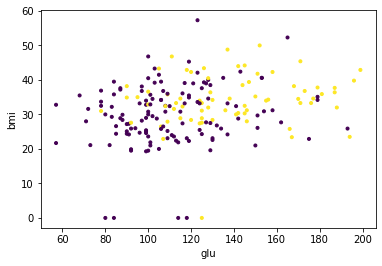

In [7]:
plt.figure('Original data')
plt.scatter(pima_tr['Glucose'], pima_tr['BMI'], marker = '.', c = pima_tr['Outcome'])
plt.xlabel('glu')
plt.ylabel('bmi')